In [1]:
# installing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Python/08-23 Instacart Basket Analysis'

In [3]:
# importing most up to date data set
ords_prods_merge = pd.read_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'orders_products_updated_4.8_v2.pkl'))

In [4]:
ords_prods_merge.head(10)

,order_id,user_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Less Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Less Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Less Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Less Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Busier Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Mid-range product,Regularly busy,Busier Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Mid-range product,Regularly busy,Busier Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Mid-range product,Least busy,Less Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer


<Axes: >

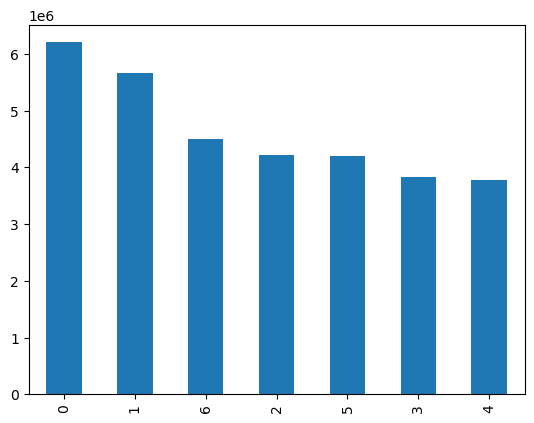

In [5]:
# creating bar chart for orders_day_of_week column with and without sort_index and with the addition of colors to the bars
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

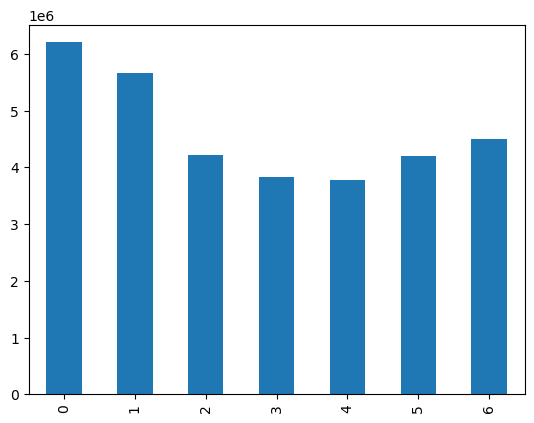

In [7]:
bar_nocolor = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

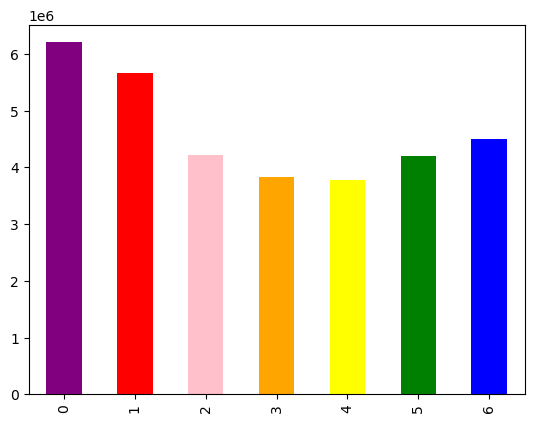

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

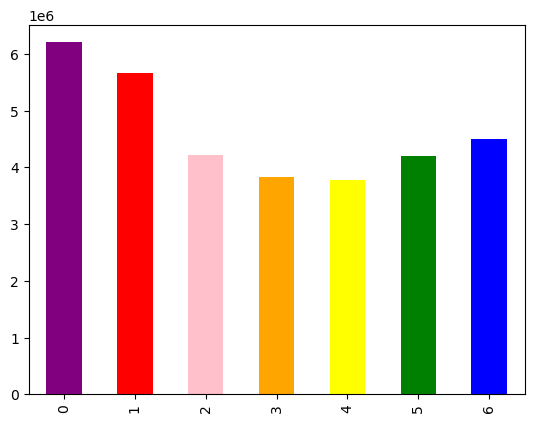

In [9]:
# exporting bar charts out of Jupyter notebook 
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [10]:
bar_nocolor.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'bar_orders_dow_nocolor.png'))

In [11]:
bar.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

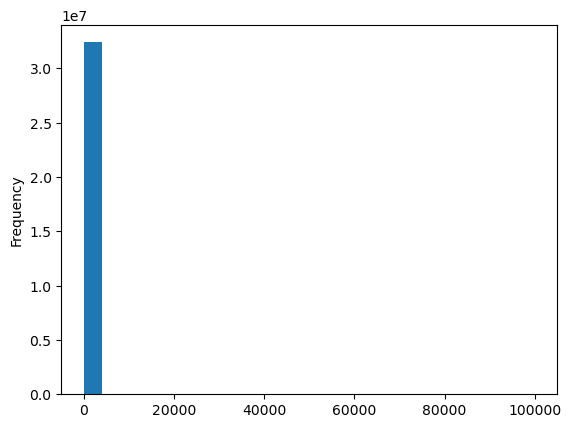

In [15]:
# creating a histogram of the frequency of different prices 
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
# our results seem to be skewed. Running describe on the prices column to investigate and then finding the max value. 
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

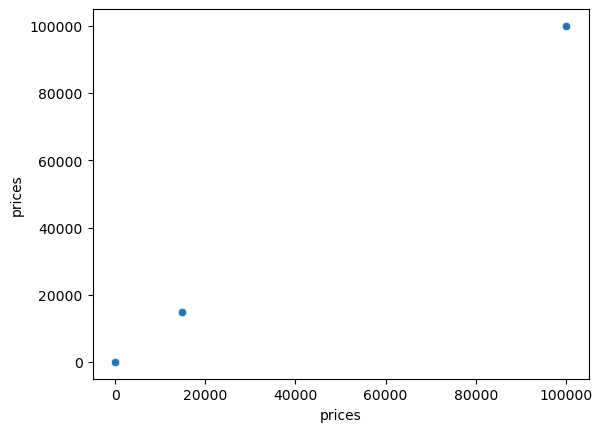

In [18]:
# creating a scatterplot with prices on both the x and y axes to determine where the outliers are
# it looks as though there is a group of outliers clustered below $20,000 and then around $100,000
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
# using .loc to pull all the rows of our dataframe where the price column is great than $100
# this will tell us how many rows have outliers for price 
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Normal Busyness Days,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Normal Busyness Days,Average Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Normal Busyness Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busier Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busier Days,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busier Days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busier Days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Less Busy Days,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Less Busy Days,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular customer


In [20]:
# Replacing any "prices" value that is over $100 with NaN so that those rows do not skew our analyses/visualizations
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [21]:
ords_prods_merge['prices'].max()

25.0

In [22]:
# It is reccomended that the above steps to replace the outliers with NaNs should have been taken in the data cleaning 
# stage. The next steps revert back to visualizations

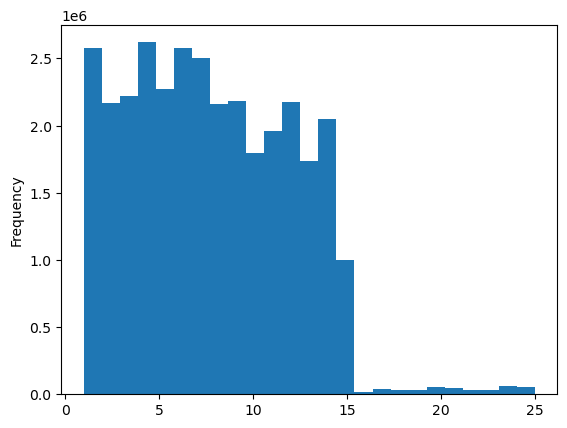

In [23]:
# Now that we have removed the outliers, creating the histogram of prices with 25 buckets 
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

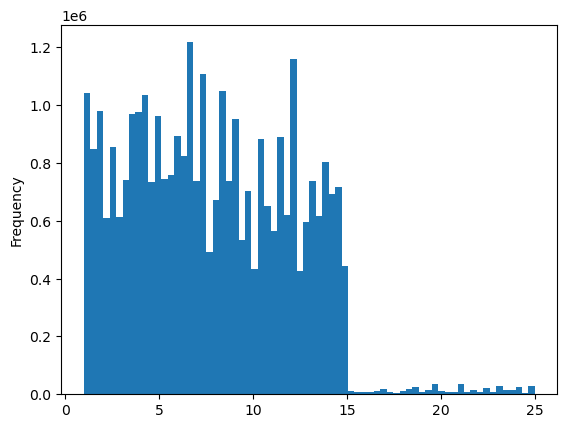

In [24]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [25]:
hist.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'hist_prices.png'))

In [26]:
hist_2.figure.savefig(os.path.join(path,'IC_Analysis', 'IC_visualizations', 'hist2_prices.png'))

In [23]:
# If we want to create a line chart for the development of the "prices" column across the days of the week
# we would need to create a sample of the data set. But, we could not just take the first 2M rows (df = ords_prods_merge[:2000000])
# because we would not be getting a true representation of the full data set that way

In [24]:
# Determining the length of the total dataframe
len(ords_prods_merge)

32404859

In [25]:
# setting the "seed" at 4 so that the randomly generate values used to create the sample remain consistent 
np.random.seed(4)

In [26]:
# Next we will create a list of boolean values "dev" that will be used for splitting our values into two groups, 
# one with 70% of the rows, one with 30%. 
# We will use np.random.rand() to generate a random list of values. The .rand() portion at the end specifies that 
# we want the values to be uniformly distributed 
# We will use len() on the entire dataframe to communicate to the function how many random values we want to generate
# We will then compare the list of random values that has as many values as the dataframe has rows to 0.7 and assign
# the boolean values of that comparison to the "dev" list 
# In that way we will have a randomly generated list of boolean values the same length as rows in the dataframe, 
# with 70% as "True" and 30% as "False"

In [27]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
# Next we will use our list of boolean values to split the dataframe into two groups "big" and "small"
# Big will be the rows from the dataframe that correspond to values of "true" in the dev boolean list
# Small will be rows from the datframe that correspond to values of Not "true" (aka false) from the dev boolean list 

In [29]:
big = ords_prods_merge[dev]

In [30]:
small = ords_prods_merge[~dev]

In [31]:
# Since we had a uniform distribution of values in the random list, and we compared those values to a value of 0.7
# we should have 70% values of True (and thus 70% of the rows assigned to "big") and 30% values of False (and thus
# 30% of values assigned to "small")

In [32]:
# We want to test to make sure that big is 70% of the total and small is 30%. Perform len on each and then len 
# on both to confirm this and that the total is equal to the length of ords_prods_merge

In [33]:
len(big)

22683761

In [34]:
len(small)

9721098

In [35]:
len(big)+len(small)

32404859

In [36]:
# Using our "small" sample of 30% of the total dataframe we will trim that down further to the only two columns we need
# for the line chart, the "orders day of the week" and "prices"
df_2 = small[['orders_day_of_week','prices']]

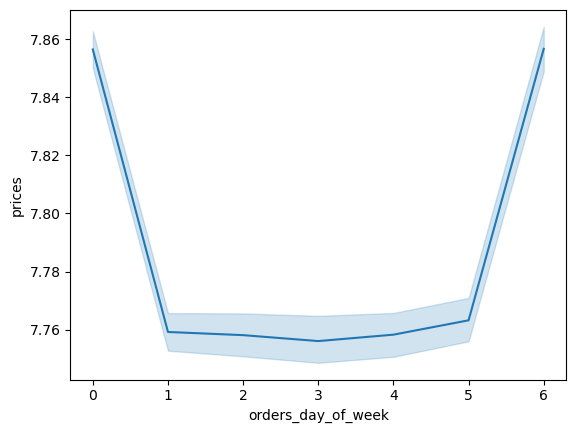

In [37]:
# Using the df_2 subset of the "small" data sample to create a line chart with order day of the week on the x-axis
# and price on the Y-axis. It shows that prices paid for items are highest on day 0 and 6, Sunday and Saturday. 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y= 'prices')

In [27]:
# Exporting the line chart from above out of the Jupyter notebook. 
line.figure.savefig(os.path.join(path,'IC_Analysis', 'IC_visualizations', 'line_dow_prices.png'))

NameError: name 'line' is not defined